CSC3310 — Program #1 — Benchmarking Insertion and Selection Sorts


In [19]:
import time
import random
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#void insertion sort(lst) takes a Python list and sorts it in place
def insertion_sort(lst):
    for i in range(1, len(lst)):
        key = lst[i]
        j = i - 1
        while j >= 0 and key < lst[j]:
            lst[j + 1] = lst[j]
            j -= 1
        lst[j + 1] = key
#void selection sort(lst) takes a Python list and sorts it in place.
def selection_sort(lst):
    n = len(lst)
    for i in range(n):
        min_idx = i
        for j in range(i + 1, n):
            if lst[j] < lst[min_idx]:
                min_idx = j
        lst[i], lst[min_idx] = lst[min_idx], lst[i]
#Tests to ensure that sorts are working properly
test_list = [64, 34, 25, 12, 22, 11, 90]
print("Original list:", test_list)
insertion_sort(test_list)
print("After insertion sort:", test_list)

test_list = [64, 34, 25, 12, 22, 11, 90]
selection_sort(test_list)
print("After selection sort:", test_list)

Original list: [64, 34, 25, 12, 22, 11, 90]
After insertion sort: [11, 12, 22, 25, 34, 64, 90]
After selection sort: [11, 12, 22, 25, 34, 64, 90]


Benchmarking Function

In [21]:
#benchmarking function that takes either algorithm to run as input and the list to sort. 
#method returns how long the given algorithm ran for
def benchmark(sorting_algorithm, input_list):
    temp_list = input_list.copy()
    start_time = time.perf_counter()
    sorting_algorithm(temp_list)
    end_time = time.perf_counter()
    return end_time - start_time

In [22]:
#different sizes to test algorithms with
sizes = [100, 1000, 5000, 10000, 20000, 40000]

#dictionary to store results for three different cases
results = {
    "insertion": {"best": [], "average": [], "worst": []},
    "selection": {"best": [], "average": [], "worst": []}
}

#for loop runs for each one of the sizes and stores results for each case
for n in sizes:
    best_case = list(range(n))
    worst_case = list(range(n, 0, -1))
    avg_case = [random.randint(0,n) for _ in range(n)]

    #benchmarking for insertion sort
    results["insertion"]["best"].append(benchmark(insertion_sort, best_case))
    results["insertion"]["average"].append(benchmark(insertion_sort, avg_case))
    results["insertion"]["worst"].append(benchmark(insertion_sort, worst_case))
    
    #benchmarking for selection sort
    results["selection"]["best"].append(benchmark(selection_sort, best_case))
    results["selection"]["average"].append(benchmark(selection_sort, avg_case))
    results["selection"]["worst"].append(benchmark(selection_sort, worst_case))

Analysis and Regression

In [23]:
#function that calculates log-log regression to get the complexity slope
def get_complexity_slope(sizes, times):
    m, b, r, p, std_err = linregress(np.log(sizes), np.log(times))
    return m

print("Calculated Slopes (m):")
for res in results:
    for case in results[res]:
        m = get_complexity_slope(sizes, results[res][case])
        print(f"{res} ({case}): m ≈ {m:.2f}")

Calculated Slopes (m):
insertion (best): m ≈ 0.86
insertion (average): m ≈ 1.93
insertion (worst): m ≈ 1.83
selection (best): m ≈ 1.93
selection (average): m ≈ 1.94
selection (worst): m ≈ 1.95


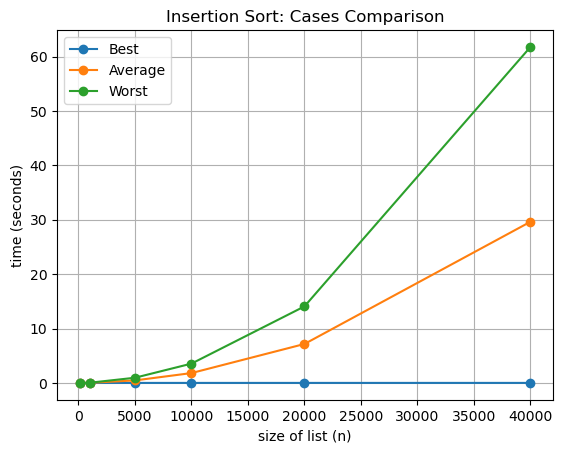

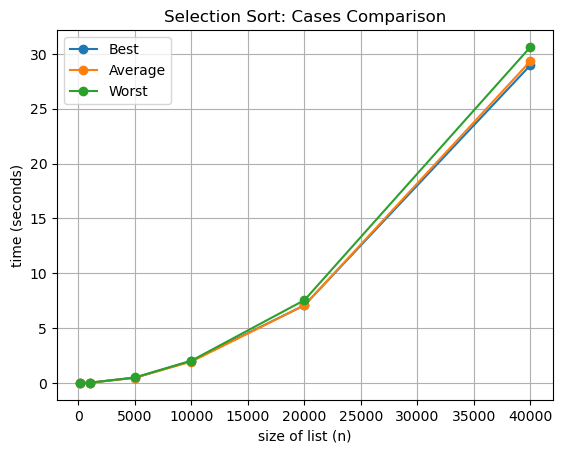

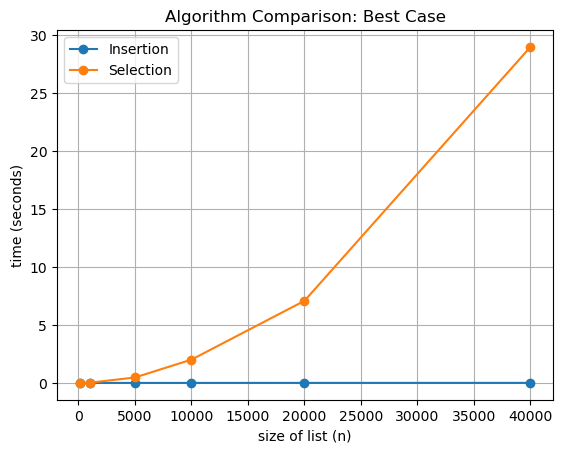

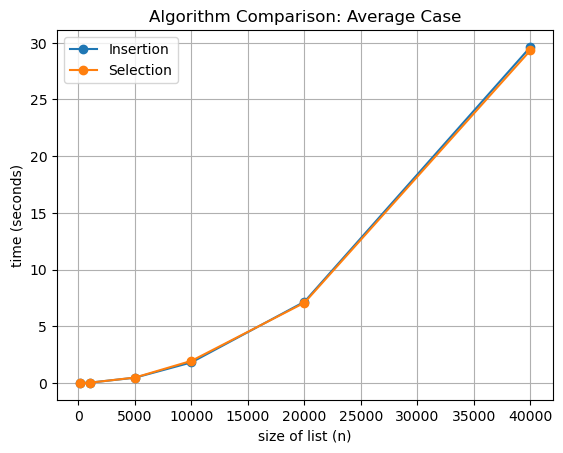

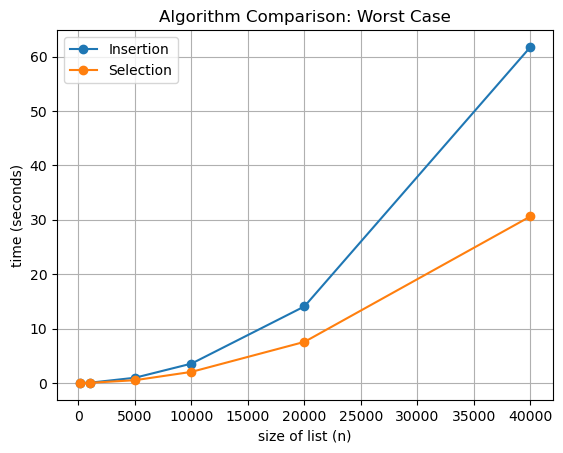

In [24]:
#function for creating plots to reduce repetition.
def make_plot(title, data_labels, data_lists, x_values):
    plt.figure()
    for label, y_values in zip(data_labels, data_lists):
        plt.plot(x_values, y_values, marker='o', label=label)
    plt.xlabel("size of list (n)")
    plt.ylabel("time (seconds)")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# case comparison for both insertion and selection
make_plot("Insertion Sort: Cases Comparison", ["Best", "Average", "Worst"], 
            [results["insertion"]["best"], results["insertion"]["average"], results["insertion"]["worst"]], sizes)

make_plot("Selection Sort: Cases Comparison", ["Best", "Average", "Worst"], 
            [results["selection"]["best"], results["selection"]["average"], results["selection"]["worst"]], sizes)

# algorithm comparison per case
for case in ["best", "average", "worst"]:
    make_plot(f"Algorithm Comparison: {case.capitalize()} Case", ["Insertion", "Selection"], 
                [results["insertion"][case], results["selection"][case]], sizes)

**Reflection Questions**

Create a table of the theoretical and estimated run time functions for the 6 combinations (2 algorithms, 3 cases). Do your estimates match the theory? If not, you may have made a mistake somewhere.


**Insertion Sort:**
|            | Best | Average | Worse |
|------------|-------|-------|-------|
| **Theoretical**  | O(n)    | O(n^2)    | O(n^2)    |
| **Estimated**  |    n  |   n^2/4  | n^2/2    |


**Selection Sort:**
|            | Best | Average | Worse |
|------------|-------|-------|-------|
| **Theoretical**  | O(n^2)    | O(n^2)    | O(n^2)    |
| **Estimated**  |    n^2/2  |   n^2/2  |  n^2/2   |


Yes, the estimated runtimes match the theoretical analysis. Insertion sort runs in linear time in the best case when the input is already sorted, and quadratic time in both the average and worst cases due to the number of comparisons and shifts required. Minor deviations in benchmark results are expected due to constant factors and system overhead.

• Which algorithm had a better run time than the other and for which case(s)? Why do you think that one case was substantially faster for that algorithm? (Hint: focus on the inner loops.)

The insertion sort seemed better especially in the cases where best O(n) time was possible. This is because insertion sort has the ability to stop early if the array is nearly or already sorted. This happens because the inner loop is comparing key with array element - no swaps will be made if already in order. However selection sort must always run the inner loop and check each element against all other elements in array to find if a swap needs to occur. 

• Based on your results, which of the two sorting algorithms would you use in practice? Why?

In pratice we would use insertion sort since it has the chance of occuring at O(n) time. Even if that is that the average case at least it is better than selection sort which seems to always have O(n^2). Insertion sort is quicker. Both sorts have about the same code complexity. 
